# HW #1: Visualization and Analysis

**Edwin Ramirez & Darshil Desai <br> 
January 2019**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import os

#set the working directory
os.chdir('./suicide-rates-overview-1985-to-2016')

path = os.getcwd()
print(path)

C:\Users\Darshil\Pacific\Semester 2\Data Viz\Assignments\HW1\anlt232_hw1\suicide-rates-overview-1985-to-2016


## Overview

This report focuses on exploring the _Suicide Rates Overview 1985 to 2016_ dataset sourced from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), which  is a compiled dataset from three separate sources. These sources include the [United Nations Development Program](http://hdr.undp.org/en/indicators/137506) and [World Bank](https://databank.worldbank.org/data/source/world-development-indicators#) for socioeconomic data, and the [World Health Organization](https://www.who.int/mental_health/prevention/suicide/suicideprevent/en/) for suicide data. Brielfy we will explore: 

1. Relationships between a country's economic growth vs the average suicide rate over time

    Due to the fact that the current dataset contains data comprising over 100 countries, we limit this particular analysis to 4 countries wherein 2 will possess high GDP per capita and the other 2 will be among the lowest. 
([Reference](https://www.oecd-ilibrary.org/economics/oecd-factbook-2010/suicide-rates-and-per-capita-gdp_factbook-2010-graph260-en))


2. Varying trends between male and female suicide rate over time

4. Compare the chages in suicide rates for each generation over time

5. idk...
...

In [2]:
data = DataFrame(pd.read_csv("master.csv"))
col_names = list(data.columns.values)
print(col_names)

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


## Cleaning 

- Drop _HDI for year_ which conveys information on the human development index. We do this due to the absence of over 50% of the missing data in the column

- Convert _gdp-for-year_ into a numeric column

-OTHER THINGS

In [3]:
#removing the HDI for year column
try:
    data  = data.drop(['HDI for year'])
except:
    print ('Column alredy dropped!')
    
#converting gdp_for_year column into a numeric one
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',','')

Column alredy dropped!


<h4><font color="blue" size = 4>Our Data</font></h4>

Our variables are as follows: 
- **country:** The country associated with the suicide record

- **year:** The year associated with the suicide record

- **sex:** The sex of the individual pertaining to the suicide record

- **suicides_no:** Number of suicides 

- **population:** Total population 

- **suicides/100k pop:** Number of suicides per 100K population  
- **gdp_per_year:** GDP value pertaining to the year of the record
- **gdp_per_capita:** GDP per caputa value pertaining to the year of the record
- **generation:** Specifies which one of the 6 generation groups the record belongs to 

In [4]:
#viewing our data
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [176]:
#Basic analysis 
age_groups = pd.DataFrame(data['age'].value_counts(dropna=False)).sort_values('age')
gen = pd.DataFrame(data['generation'].value_counts(dropna=False))
countries = pd.DataFrame(data['country'].value_counts(dropna=False))
gender = pd.DataFrame(data['sex'].value_counts(dropna=False))

# Some Group-bys to help with certain visualizations

# Average GDP_per_capita per country per year
data.groupby(['country', 'year'])['gdp_per_capita ($)'].mean()

#Average number of suicides per country per year
aa = pd.DataFrame(data.groupby(['country', 'year'])['suicides_no','gdp_per_capita ($)' ].mean())

#distrubution ofage brackets per country
count_age  = data.groupby(['country', 'age'])['age'].count()

# Average population per country in 100s
avg_pop_bycountry = round(pd.DataFrame(data.groupby(['country'])['population'].mean())/100,0)

#average GDP value in the following countries: United States|Sweden|Sri Lanka|Armenia|Albania
gdp_per_country = round(pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Ukraine')].groupby(['country'])['gdp_per_capita ($)'].mean())/100,0).sort_values('gdp_per_capita ($)')

selected_countries = data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Albania')]       

## Visualizing our dataset

- Some basic visuals showcasing the type of data we have etc etc 

([<matplotlib.patches.Wedge at 0x1f3d2446ef0>,
 [Text(0.95428,0.547129,'5-14 years'),
  Text(0.00596244,1.09998,'15-24 years'),
  Text(-0.950301,0.554011,'25-34 years'),
  Text(-0.95428,-0.547129,'55-74 years'),
  Text(-0.00198749,-1.1,'35-54 years'),
  Text(0.952297,-0.550574,'75+ years')])

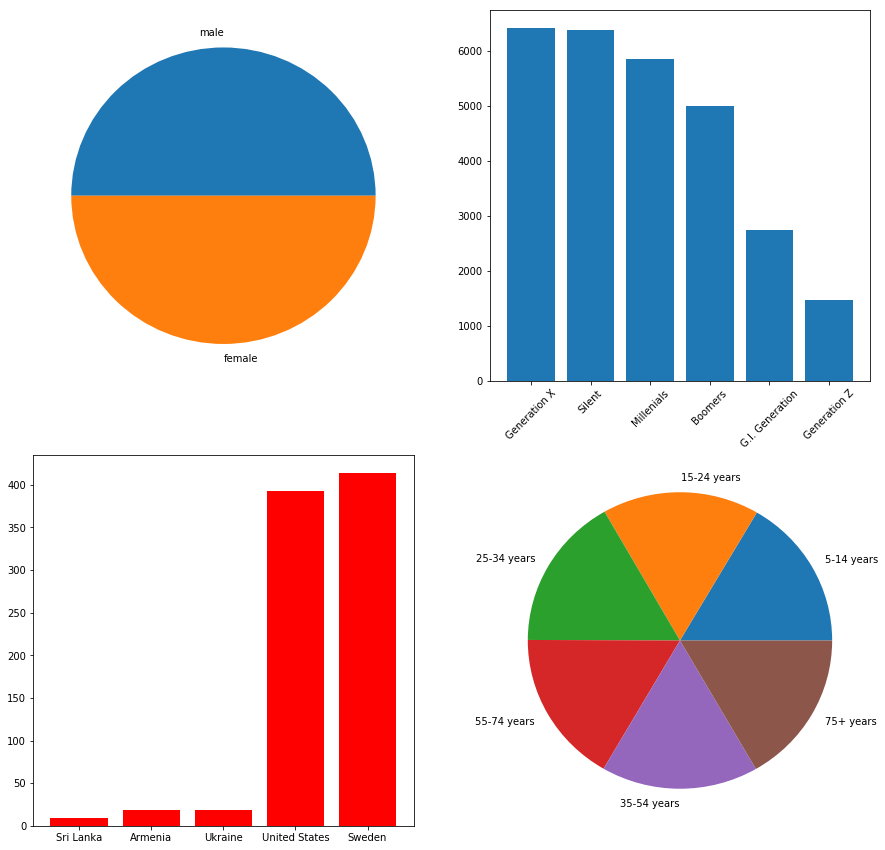

In [177]:
plt.figure(figsize=(15,15))

#Proportion of overall male vs female
plt.subplot(2,2,1)
plt.pie(gender, labels =list(gender.index) )

# Distrubution of diff generations
plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.bar(list(gen.index),gen['generation'])

# Comparing mean GDP across selected countries
plt.subplot(2,2,3)
plt.bar(list(gdp_per_country.index),gdp_per_country['gdp_per_capita ($)'], color='red')

#
plt.subplot(2,2,4)
plt.pie(age_groups['age'], labels = list(age_groups.index))

## Examining Claim 1 

: Here we will try and determine the strength of the relationship between a countrys' economic growth (measured by the GDP per capita) and the the average suicide rate over time. 

Briefly:
- (i) We will compare and examine the changing average global GDP per capita and the resultant suicide rate over the years
- (ii) Following which we will compare the same metrics but between countries with a high GDP and countries with low GDP. 

It may be worth to hypothesize that economic downturn in wealthier countries may yield to proportionally less hardship amongst its constutuents. Whereas constituents of poorer countries may not experience economic downturn with relative ease

### (i) Comparing GDP per capita growth and global suicide rates

We begin examing our first claim by briefly comparing the global GDP per capita growth and global suicide rates between the years 1985 to 2016. Here we aim to explore the question: in general all over the world is there a non-causal or causal relationship between improving or deteriorating economic trends and suicide rates?

Based on the visual data graphed below, it is interesting to observe an inverse correlation between the 2 factors. Particularily we observe the following: 
- A steady growth in GDP per capital between the years 1990 and 1995 is followed by a decreasing rate of change in annual suicide rates in the same time period. I.e: the suicide rate seems to keep on increasing but at a rate much slower than the previous years


- The time period between 1995 and 2010 shows the global GDP per capita consistently growing whilst simultaneously experiencing a gradual decrease in average suicide rates. This time period is where a non-causal relationship could be established simply based on the visual evidence the data provides. 


- The time period between 2010 and 2015 shows the negative rate of change in average number of suicides gradually diminishing and moving towards a positive rate of change, thus implying that an increase in the average number of suicides. A possible explanation for this phenomenon could be attributed to the possible spillover economic effects of the global 2008 financial slowdown among many other factors. Although the given data does not allow us to attribute this trend in average suicide rate entirely to the financial turmoil, it gives us enough evidence to assert that there may be an inverse relationship between GDP per capita growth and suicide rates.

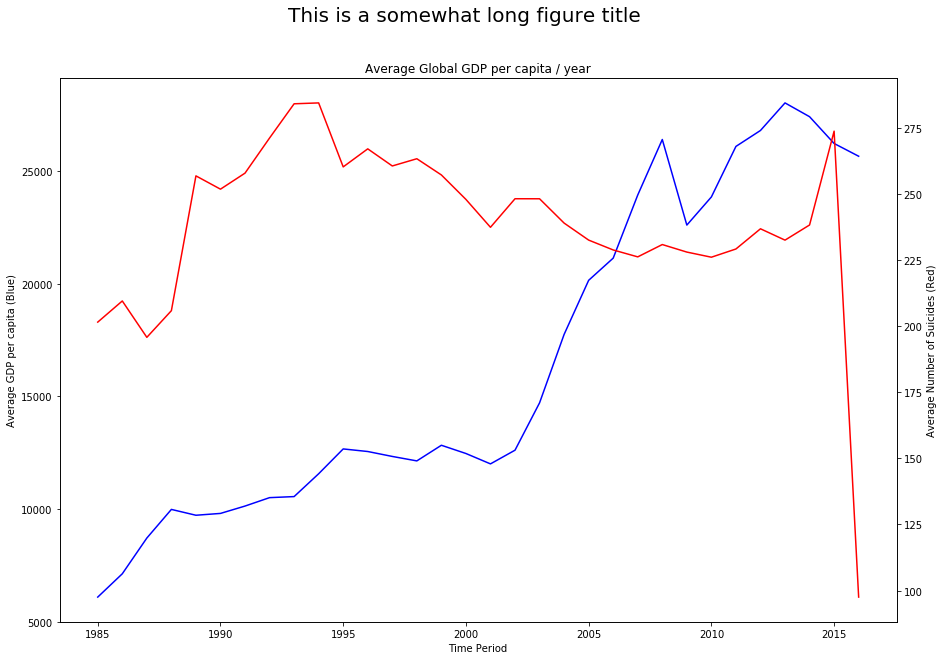

In [43]:
plt.figure(figsize=(15,10))
plt.suptitle('This is a somewhat long figure title', fontsize=20)
plt.title('Average Global GDP per capita / year')
plt.xlabel('Time Period')
plt.ylabel('Average GDP per capita (Blue)')

plt.plot(data.groupby('year')['gdp_per_capita ($)'].mean(), c='blue')
plt.twinx()  # initialize a second axis 
plt.ylabel('Average Number of Suicides (Red)')
plt.plot(data.groupby('year')['suicides_no'].mean(), c='red')

### (ii) Comparing GDP per capita growth and suicide rates to limited countries

Although we were generally able to establish a simplistic non-causal relationship between the 2 metrics on a global scale, it is important to acknowledge the difference in proportional effects of economic growth on a country's average annual suicide rate. 

Here we wish to hypothesize that the effect of a nation's economic activity on its annual suicide rates will vary considerably based on the wealth and status of a country.  For instance: an economic downtown in a wealthy country such as the United States may observe a proportionally smaller change in the average annual number of suicides as opposed to a poorer country such as Armenia or Albania.

In order to examine this claim we will: 
- Compare the change in GDP per capita with the average annual suicide rate between 2 wealthy countries and 2 relatively poorer countries.

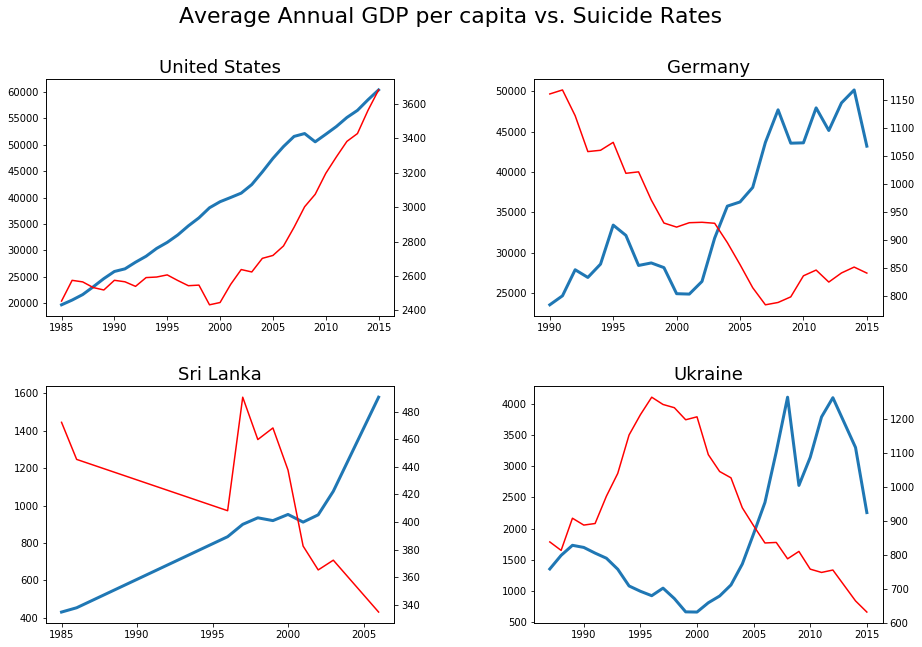

In [182]:
"""
Simple function to help graph comparitive line plots between average GDP per capita and the average annual suicide rates. 

Parameters: 4 countries each labeled c1, c2, c3 and c4 respectively 
"""

def compare_plot(c1,c2,c3,c4):    
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.3)
    
    #---------------------------------------------
    plt.subplot(2,2,1)
    # Figure title
    plt.suptitle('Average Annual GDP per capita vs. Suicide Rates', fontsize=22)

    # First plot
    plt.title('{}'.format(c1),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c1)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)
    ## Examining Claim 1 )

    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c1))].groupby('year')['suicides_no'].mean(), c = 'red')
    

    #---------------------------------------------
    plt.subplot(2,2,2)

    plt.title('{}'.format(c2),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c2)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)

    # Second plot
    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c2))].groupby('year')['suicides_no'].mean(), c = 'red')
    
    #---------------------------------------------
    plt.subplot(2,2,3)

    plt.title('{}'.format(c3),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c3)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)

    # Second plot
    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c3))].groupby('year')['suicides_no'].mean(), c = 'red')
    
    #---------------------------------------------
    plt.subplot(2,2,4)
    
    plt.title('{}'.format(c4),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c4)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)

    # Second plot
    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c4))].groupby('year')['suicides_no'].mean(), c = 'red')
    
    #insert any 4 countries to compare
compare_plot('United States', 'Germany', 'Sri Lanka', 'Ukraine')

The visual analysis comparing GDP per capita and suicide rates between different countries yields interesting observations

- United States: there seems to be no effect of the increasing GDP per capita value on the average annual suicide rate. 

- Germany: Here we see some resemblance of correlation between the 2 metrics. Overall the country's experiences increasing GDP per capita value whilst simultaneously also experiencing a gradual decrease in average suicide rates over the time period. It may be important to note that the shrot period of pullback between the years 1995 and 2000 do not affect in any way the decreasing suicide rates 

- Sri Lanka: In the case of Sri Lanka the overall the GDP per capita and annual suicide rates experience an overall increase and decrease respectively. However it is important to note time period between 1995 and 2000 during which there occurs a slowdown in GDP per capita value and a sudden increase in the annual suicide rate. 

- Ukraine: Here there is a clearer presence of an inverse relationship between the 2 metrics. Unfavorable economic events during the time period between 1990 and 1997 experiences increasing suicide rates followed by a gradual decline as the GDP per vapita value begins to bottom out before increasing again. 

**Conclusion:** We can sufficiently conclude, based on the given data and visual analysis, to have enough evidence to support our claim that economic downturns affect the suicide rate between wealthier and poorer nations differently. 

## Examining Claim 2



